## Integrantes:
1. Camila Coltriani
2. Luis Dartayet
3. Irania Fuentes
4. Jonathan Fichelson
5. Ornella Cevoli

# Trabajo práctico 2 : Modelo de regresión lineal del dataset Properatti

# Objetivos

El objetivo de este trabajo final es generar y comparar estadisticamente tres modelos de regresion lineal sobre el dataset limpio de Properatti construido en el TP_1; en este, fue planteado la hipotesis que el precio (variable objetivo) de las propiedades iba a estar influenciado principalmente por la superfice y la ubicacion (variables predictoras). 

Con base a esto, se han planteado los siguientes objetivos especificos:
- Explorar el dataset limpio con la finalidad de verificar si debe realizarse una ultima limpieza o pueden utilizase los datos directamente;
- Visualizar las distribuciones y relaciones de las variables predictoras y objetivo con la finalidad de determinar la zona y tipo de inmueble para la realizacion de los modelos;
- Construir modelos (machine learning) que permitan predecir la relación entre los atributos de las viviendas y el precio de estas;
- Implementar un modelo de regularización con la finalidad de compararlos y evaluar si existe o no problemas de sobreajuste;
- Determinar el modelo que más se ajusta al comportamiento de los datos analizados.  

In [2]:
#Las librerías utilizadas en este documento son:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

from matplotlib.ticker import ScalarFormatter
from matplotlib import gridspec
sns.set()

In [3]:
#diferencias de precios en la misma zona

In [4]:
# Con la finalidad de comparar el modelo en distintas Municipios:  La Matanza, Lomas de Zamora y Tigre 
#tienen más de 500 registros
#son de tres zonas distintas del conurbano
# la cantidad de registros no varia mucho entre ellos
# armar un modelo inicial con superficie total 
# ver el tema de la ubicacion relacionarla con algun punto y calcular distancias 
# variable target precio 
# variables predictoras superfice total y ubicacion #probar con otra: ambientes 

#armar tres datasets: uno por cada municipio 



In [5]:
# Visualización de la forma y atributos del dataset
data = pd.read_csv("./data_limpio_gdf.csv")
print(data.shape)
print("El dataset está compuesto por:", data.shape[0], "filas y",data.shape[1],"columnas.")
data.sample(5)

(45439, 15)
El dataset está compuesto por: 45439 filas y 15 columnas.


,municipio,provincia,lat,lon,sup_m2_total,precio_usd,tipo,ambientes_cat,precio_usd_por_m2,tipo_cat_code,municipio_cat_code,provincia_cat_code,ambientes_cat_code,geometry,precio_usd_por_m2_cat
29868,Parque Patricios,Capital Federal,-34.643545,-58.414790,57.0,110000.0,apartment,2,1929.824561,1,232,5,2,POINT (-58.4147899 -34.643545200000005),4
35898,Belgrano,Capital Federal,-34.563901,-58.466787,32.0,110000.0,apartment,1,3437.500000,1,25,5,1,POINT (-58.4667872223 -34.5639010429),8
44929,Capitán Bermúdez,Santa Fe,-32.820852,-60.723292,75.0,70000.0,house,1,933.333333,2,45,24,1,POINT (-60.723292 -32.8208515),0
42875,Saavedra,Capital Federal,-34.541728,-58.477260,61.0,148000.0,PH,3,2426.229508,0,286,5,3,POINT (-58.4772598 -34.541728000000006),6
18797,Rosario,Santa Fe,-32.954007,-60.658785,156.0,415000.0,apartment,4 o mas,2660.256410,1,276,24,4,POINT (-60.65878539999999 -32.9540066),7


### Descripción de las columnas del dataset limpio:

Las columnas que incluye son:

● municipio: ubicacion del inmueble por su municipio/barrios

● provincia: ubicacion del inmueble por provincia

● lat  ●lon: ubicacion de latitud y longitud

● superficie_m2_total: superficie total en m² del inmueble

● price_usd: Precio en dolares del inmueble

● tipo: tipo de inmueble en venta (casa, departamento, ph, tienda)

● ambientes_cat: cantidad de ambientes del inmueble (0, 1, 2, 3 , 4 o más)

● precio_usd_por_m2: Precio en dolares por metro cuadrado (USD/m²: precio dólares / superficie)

● tipo_cat_code: categoria numerica de tipo de inmueble

● municipio_cat_code: categoria numerica de municipios

● provincia_cat_code: categoria numerica de provincia

● tipo_cat_code: categoria numerica de ambientes_cat

● geometry: figura geometrica de latitud y la longitud

● country_name: nombre del país donde ocurre la operacion inmobiliaría

● **precio_usd_por_m2_cat: categoria numerica de precio_usd_por_m2**

# Analisis exploratorio y visualizacion de correlaciones entre las variables

In [6]:
#Revisamos la presencia de datos NaN
data.isna().sum().sort_values()

municipio                   0
provincia                   0
lat                         0
lon                         0
sup_m2_total                0
precio_usd                  0
tipo                        0
precio_usd_por_m2           0
tipo_cat_code               0
municipio_cat_code          0
provincia_cat_code          0
ambientes_cat_code          0
geometry                    0
precio_usd_por_m2_cat       0
ambientes_cat            1248
dtype: int64

In [7]:
#reviso donde están ubicados los registros nulos para saber si afectaran escoger un tipo de inmueble y su zona
mascara_nulos = data["ambientes_cat"].astype(str) == "nan" 
data_nulos = data[mascara_nulos]
#data_nulos.loc[:, ["municipio", 'tipo', 'ambientes_cat', "precio_usd"]]
#print(data[mascara_nulos].index)

In [8]:
#agrupamos los registros donde hay nulos
pd.options.display.max_rows = None
data_nulos.groupby(["tipo"])["municipio"].value_counts().sort_values(ascending=False)

tipo       municipio                          
apartment  Córdoba                                73
           Rosario                                56
house      Almirante Brown                        55
apartment  Palermo                                33
house      Punilla                                29
           Córdoba                                28
store      Mar del Plata                          28
house      Lomas de Zamora                        26
           San Miguel                             26
           Ituzaingó                              22
           La Matanza                             21
           Morón                                  21
apartment  Villa Carlos Paz                       21
           Barrio Norte                           19
           Belgrano                               18
           Pinamar                                17
           San Miguel                             17
house      Bahía Blanca                           15

In [9]:
data.dropna(subset=['ambientes_cat'], inplace=True)

In [10]:
data.isna().sum()

municipio                0
provincia                0
lat                      0
lon                      0
sup_m2_total             0
precio_usd               0
tipo                     0
ambientes_cat            0
precio_usd_por_m2        0
tipo_cat_code            0
municipio_cat_code       0
provincia_cat_code       0
ambientes_cat_code       0
geometry                 0
precio_usd_por_m2_cat    0
dtype: int64

In [11]:
#graficamos las provincias y municipios que contengan un valor minimo de 500 registros por municipio
limite = 500
data = data.copy().groupby(['municipio']).filter(lambda grp: grp.shape[0] > limite)

c:\Users\DELL\anaconda3\envs\DH\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


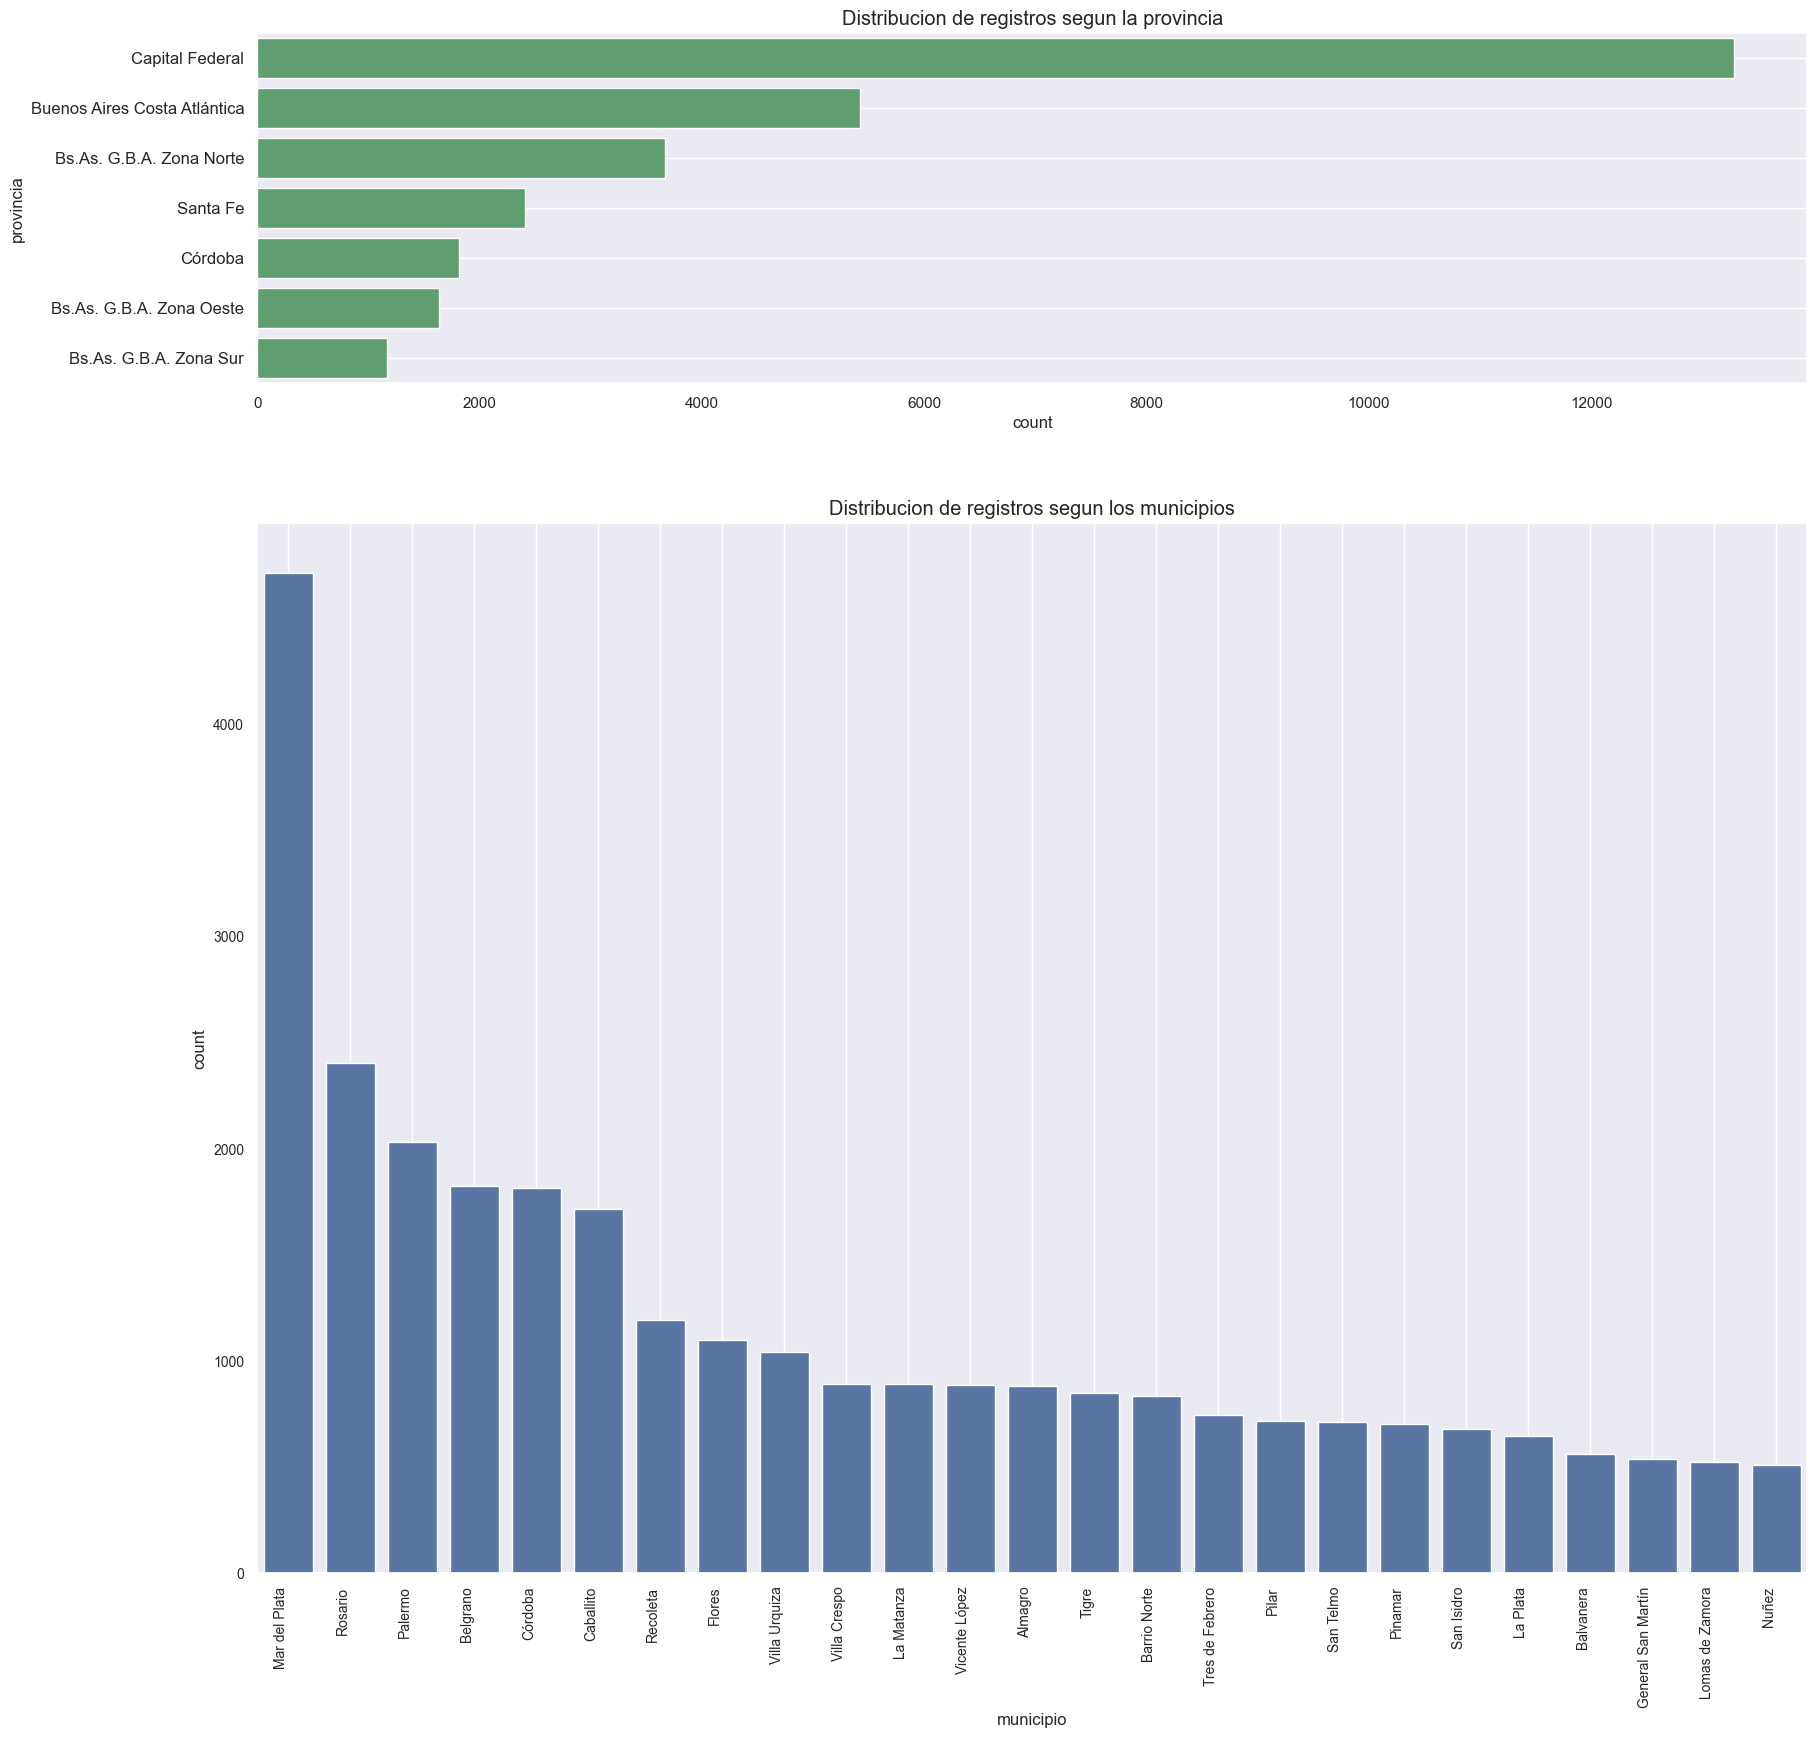

In [12]:
fig= plt.subplots(figsize=(20,20),constrained_layout=True)
grid = gridspec.GridSpec(2, 1, height_ratios=[1, 3])

ax1=plt.subplot(grid[0])
sns.countplot(data=data,y="provincia",order=data["provincia"].value_counts().index ,ax=ax1,color="g")

ax1.set_yticklabels(ax1.get_yticklabels(),fontsize="medium")
ax1.set_title("Distribucion de registros segun la provincia", fontsize= 'large')

ax2=plt.subplot(grid[1])
sns.countplot(data=data,x="municipio",order=data["municipio"].value_counts().index,ax=ax2,color="b")


ax2.set_title("Distribucion de registros segun los municipios", fontsize= 'large')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90,ha="right")
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
ax1.grid()
ax2.grid()
plt.show()

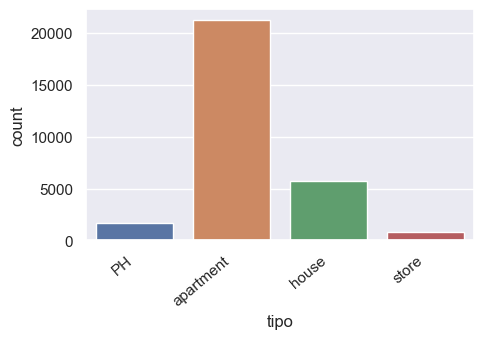

In [13]:
#Revisamos la distribucion de registros por tipo de inmueble
plt.figure(figsize=(5,3))

plt.gca().yaxis.set_major_formatter(ScalarFormatter())
ax = sns.countplot(data = data, x = "tipo")
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")
plt.show()

#Apartamentos tiene la mayoria de los datos

In [14]:
#Revisamos la ubicacion de los los tipos de inmueble que contienen la mayor cantidad de registros
pd.options.display.max_rows = None
data.groupby(["municipio"])["tipo"].value_counts().sort_values(ascending=False)

municipio           tipo     
Mar del Plata       apartment    3336
Rosario             apartment    2011
Palermo             apartment    1800
Belgrano            apartment    1670
Caballito           apartment    1559
Recoleta            apartment    1121
Mar del Plata       house         935
Villa Urquiza       apartment     892
Flores              apartment     880
Córdoba             apartment     864
                    house         829
Barrio Norte        apartment     782
Almagro             apartment     766
Villa Crespo        apartment     722
Tigre               house         650
San Telmo           apartment     637
Vicente López       apartment     517
Balvanera           apartment     493
Tres de Febrero     apartment     444
Pilar               house         443
Nuñez               apartment     437
La Matanza          apartment     424
La Plata            apartment     406
Pinamar             apartment     386
San Isidro          house         378
Mar del Plata       

In [15]:
#Realizamos una descripcion estadistica del dataset
data.describe()

# Existen valores de 0 en sup_m2_total: tomar en cuenta al elegir los registros 

,lat,lon,sup_m2_total,precio_usd,precio_usd_por_m2,tipo_cat_code,municipio_cat_code,provincia_cat_code,ambientes_cat_code,precio_usd_por_m2_cat
count,29379.000000,29379.000000,29379.000000,2.937900e+04,2.937900e+04,29379.000000,29379.000000,29379.000000,29379.000000,29379.000000
mean,-34.869443,-58.811503,101.229109,2.288630e+05,inf,1.192927,191.428265,5.529426,2.561728,4.899146
std,1.673084,1.585928,223.548856,3.169999e+05,NaN,0.568552,113.314408,5.992096,1.159322,2.771767
min,-38.416097,-65.201860,0.000000,1.500000e+01,2.000000e-01,0.000000,6.000000,0.000000,0.000000,0.000000
25%,-34.645060,-58.549317,41.000000,8.800000e+04,1.585366e+03,1.000000,89.000000,3.000000,2.000000,3.000000
50%,-34.594573,-58.444038,63.000000,1.400000e+05,2.187500e+03,1.000000,188.000000,5.000000,3.000000,5.000000
75%,-34.538069,-58.388586,118.000000,2.500000e+05,2.950125e+03,1.000000,276.000000,5.000000,4.000000,7.000000
max,-30.650681,-56.773599,30000.000000,1.111111e+07,inf,3.000000,392.000000,24.000000,4.000000,9.000000


In [16]:
#Vemos la correlacion entre las variables 
data_corr = data.corr()
data_corr

,lat,lon,sup_m2_total,precio_usd,precio_usd_por_m2,tipo_cat_code,municipio_cat_code,provincia_cat_code,ambientes_cat_code,precio_usd_por_m2_cat
lat,1.000000,-0.798038,0.022030,0.129648,0.050205,0.055463,-0.040406,0.485923,-0.014288,0.068121
lon,-0.798038,1.000000,-0.028880,-0.075335,-0.035674,-0.108142,0.110763,-0.557161,0.012862,0.189020
sup_m2_total,0.022030,-0.028880,1.000000,0.381265,-0.028048,0.220143,0.020137,-0.057834,0.266690,-0.140891
precio_usd,0.129648,-0.075335,0.381265,1.000000,0.155302,0.180264,0.001697,-0.020627,0.331693,0.272895
precio_usd_por_m2,0.050205,-0.035674,-0.028048,0.155302,1.000000,0.013179,0.005164,0.011425,-0.063606,0.166940
tipo_cat_code,0.055463,-0.108142,0.220143,0.180264,0.013179,1.000000,0.066206,-0.056869,0.163247,-0.234625
municipio_cat_code,-0.040406,0.110763,0.020137,0.001697,0.005164,0.066206,1.000000,0.046521,-0.014797,-0.038807
provincia_cat_code,0.485923,-0.557161,-0.057834,-0.020627,0.011425,-0.056869,0.046521,1.000000,-0.160088,-0.071474
ambientes_cat_code,-0.014288,0.012862,0.266690,0.331693,-0.063606,0.163247,-0.014797,-0.160088,1.000000,-0.209376
precio_usd_por_m2_cat,0.068121,0.189020,-0.140891,0.272895,0.166940,-0.234625,-0.038807,-0.071474,-0.209376,1.000000


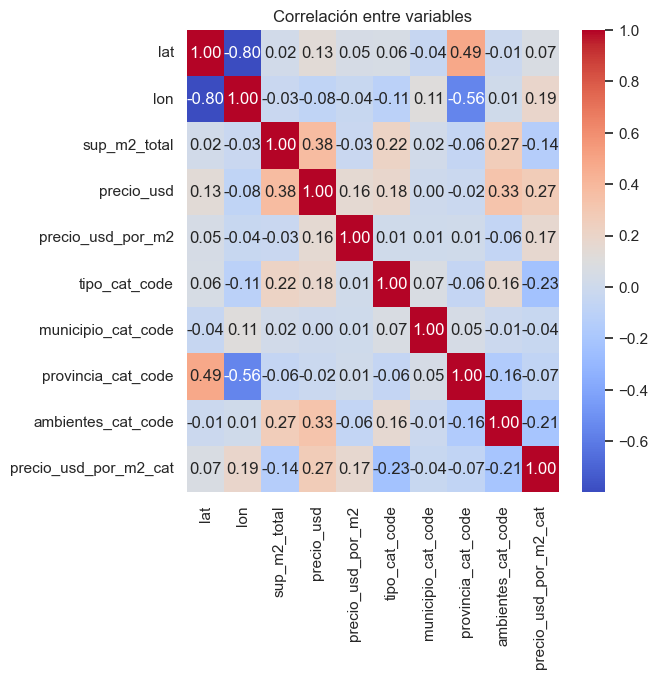

In [17]:
#graficamos
plt.figure(figsize=(6,6))
sns.heatmap(data_corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlación entre variables")
plt.show()

#puede verse una correlacion significativa entre ambientes_cat_code y precio_usd (0.31)
#tipo_cat_code / ambientes_cat_code y sup_m2_total
#precio_usd_por_m2_cat y lon

In [18]:
#figz= plt.figure()
#mask_cols= ["tipo","sup_m2_total","precio_usd","precio_usd_por_m2"]
#graph=sns.pairplot(data[mask_cols],hue="tipo")
#graph.fig.set_size_inches(16,8)
#plt.grid()
#plt.show()

## Correlacion entre la variables del dataset

In [19]:
data_2 = data[["tipo","sup_m2_total","precio_usd","precio_usd_por_m2", "ambientes_cat", "municipio_cat_code", "ambientes_cat_code","lat"]]

In [20]:
#g = sns.PairGrid(data_2, hue="tipo")
#g.map(sns.scatterplot)
#g.add_legend()

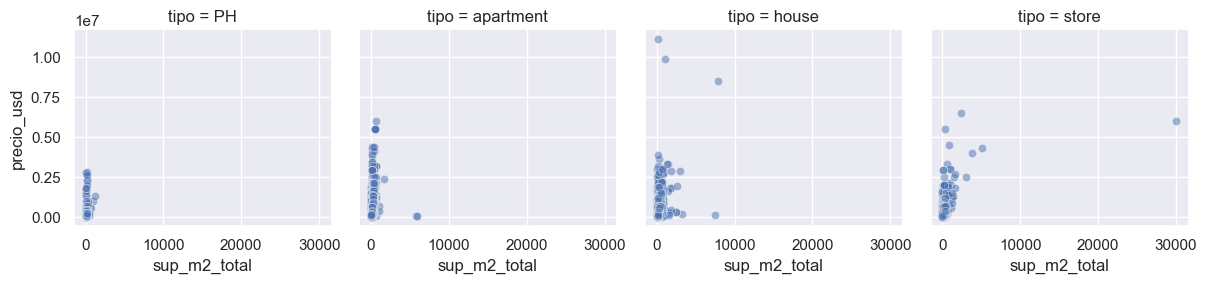

In [21]:
# Realizamos los siguientes graficos para visualizar mejor las relaciones
g = sns.FacetGrid(data_2, col="tipo")
g.map(sns.scatterplot, "sup_m2_total", "precio_usd", alpha=.5)
g.add_legend()

#

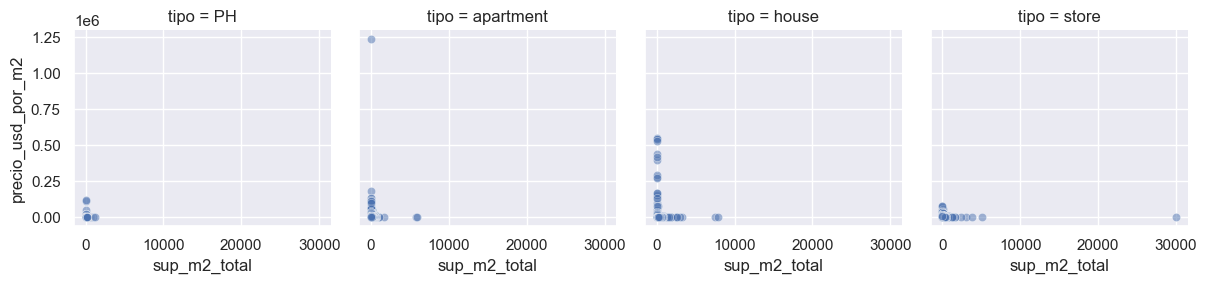

In [22]:
g = sns.FacetGrid(data_2, col="tipo")
g.map(sns.scatterplot, "sup_m2_total", "precio_usd_por_m2", alpha=.5)
g.add_legend()

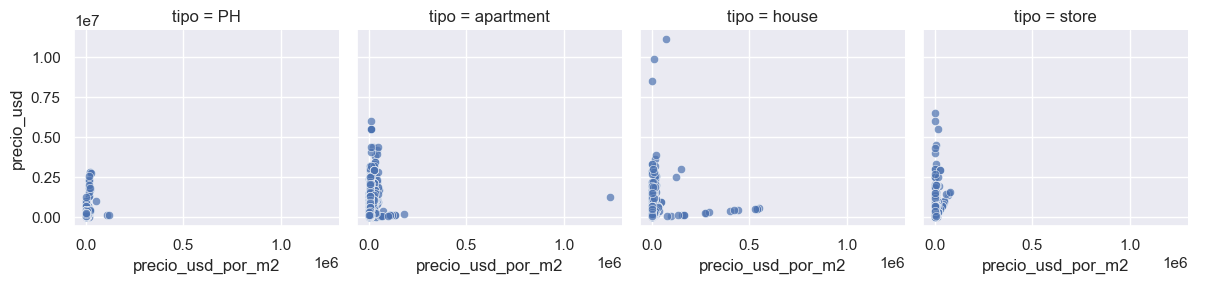

In [23]:
g = sns.FacetGrid(data_2, col="tipo")
g.map(sns.scatterplot, "precio_usd_por_m2", "precio_usd", alpha=.7)
g.add_legend()

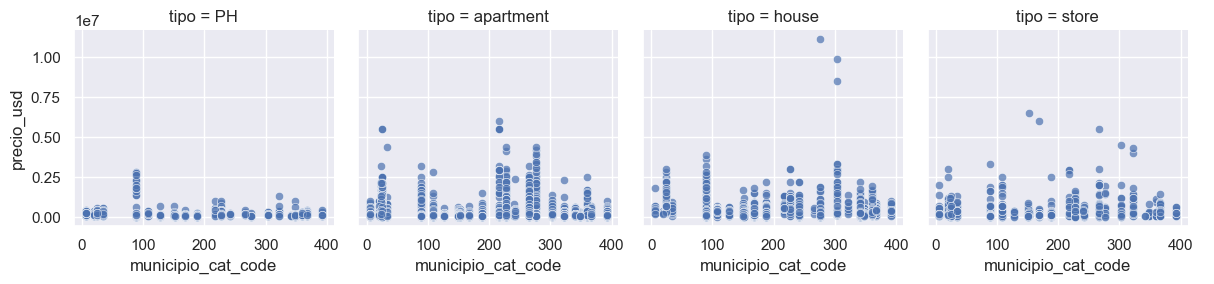

In [24]:
g = sns.FacetGrid(data_2, col="tipo")
g.map(sns.scatterplot, "municipio_cat_code", "precio_usd", alpha=.7)
g.add_legend()

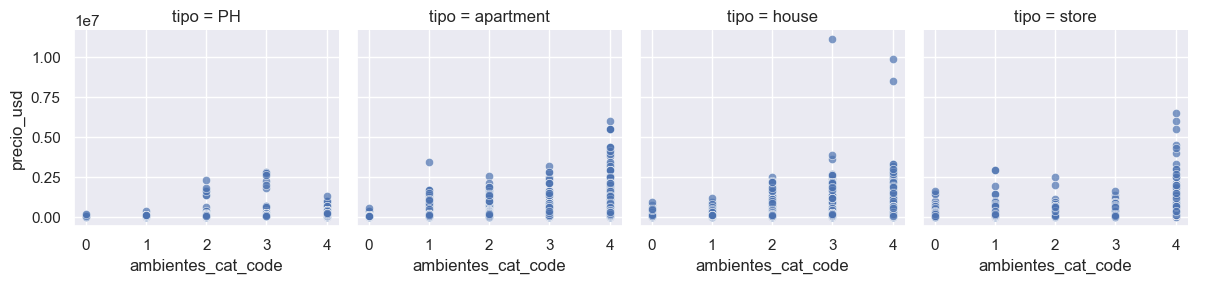

In [25]:
g = sns.FacetGrid(data_2, col="tipo")
g.map(sns.scatterplot, "ambientes_cat_code", "precio_usd", alpha=.7)
g.add_legend()

In [26]:
#masc_dep = data[data["tipo"]=="apartment"]
#sns.scatterplot(data=masc_dep, x='sup_m2_total', y='precio_usd', palette="deep")
#plt.grid()
#plt.show()

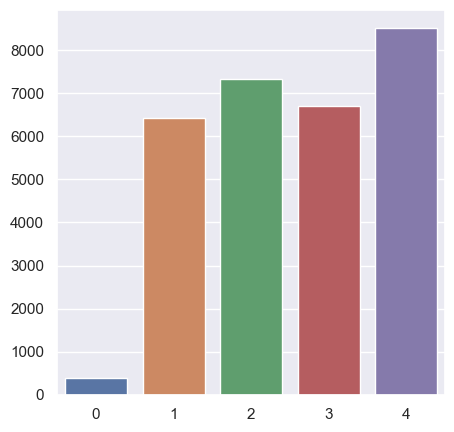

In [27]:
manf_sort = pd.get_dummies(data['ambientes_cat_code']).sum().sort_values(ascending = False)
plt.figure(figsize=(5,5))
sns.barplot(x = manf_sort.index, y = manf_sort.values)

plt.show()

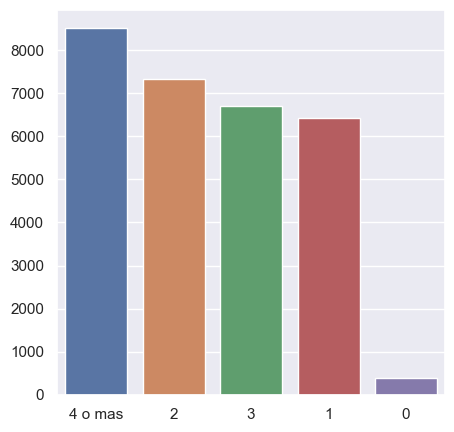

In [28]:
manf_sort = pd.get_dummies(data['ambientes_cat']).sum().sort_values(ascending = False)
plt.figure(figsize=(5,5))
sns.barplot(x = manf_sort.index, y = manf_sort.values)

plt.show()

In [29]:
#la variable target debe tener una distribucion cercana a la normal

C:\Users\DELL\AppData\Local\Temp\ipykernel_14344\1046383207.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=masc_barrio, x='sup_m2_total', y='precio_usd', palette="deep")


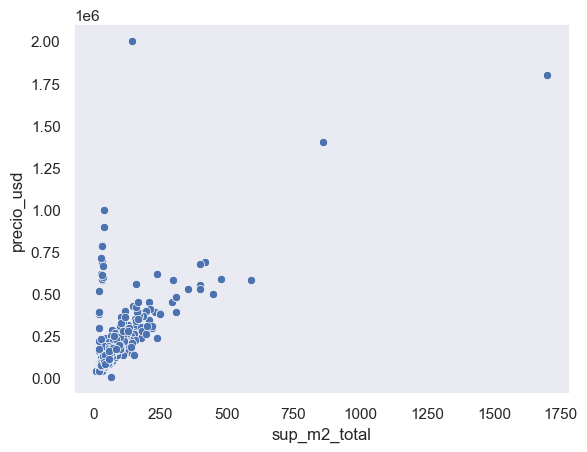

In [30]:
masc_barrio = data[data["municipio"]=="Almagro"]
sns.scatterplot(data=masc_barrio, x='sup_m2_total', y='precio_usd', palette="deep")
plt.grid()
plt.show()

Text(0.5, 1.0, 'Superficie total por tipo de inmueble ')

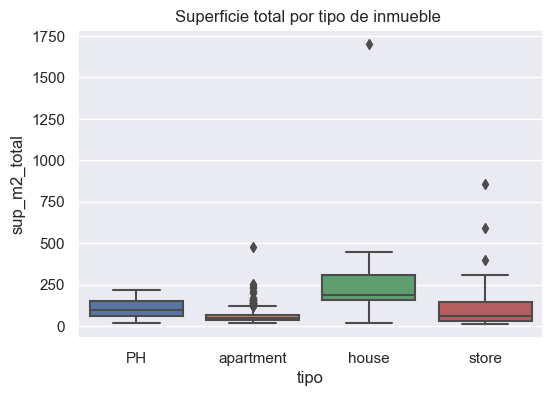

In [31]:
masc_barrio = data[data["municipio"]=="Almagro"]
sns.set_style('darkgrid')
plt.figure(figsize=(6, 4))
sns.boxplot(data=masc_barrio, x= "tipo", y="sup_m2_total")

plt.xlabel("tipo")
plt.ylabel("sup_m2_total")
plt.title("Superficie total por tipo de inmueble ")

Text(0.5, 1.0, 'Precio/m2 por tipo de inmueble ')

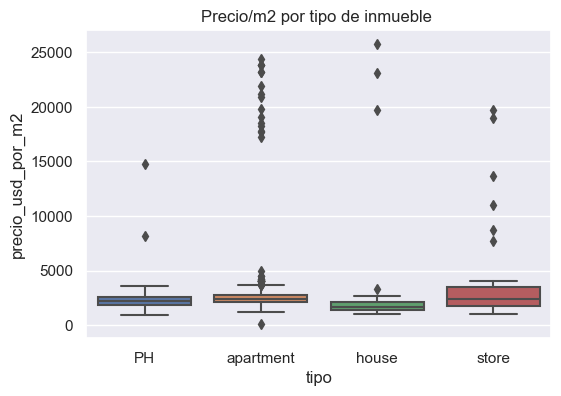

In [32]:
masc_barrio = data[data["municipio"]=="Almagro"]
sns.set_style('darkgrid')
plt.figure(figsize=(6, 4))
sns.boxplot(data=masc_barrio, x= "tipo", y="precio_usd_por_m2")

plt.xlabel("tipo")
plt.ylabel("precio_usd_por_m2")
plt.title("Precio/m2 por tipo de inmueble ")

C:\Users\DELL\AppData\Local\Temp\ipykernel_14344\4246095672.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=masc_barrio, x='sup_m2_total', y='precio_usd', palette="deep")


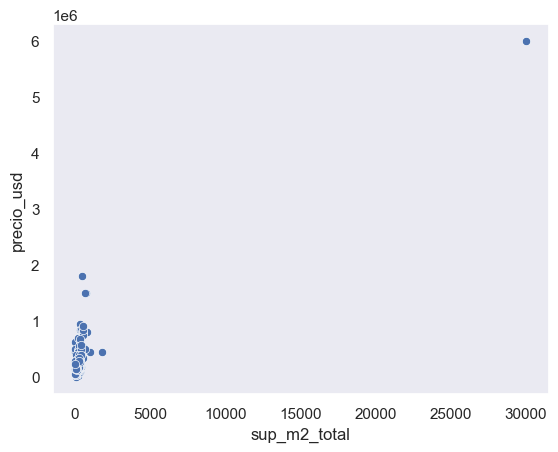

In [33]:
masc_barrio = data[data["municipio"]=="Lomas de Zamora"]
sns.scatterplot(data=masc_barrio, x='sup_m2_total', y='precio_usd', palette="deep")
plt.grid()
plt.show()

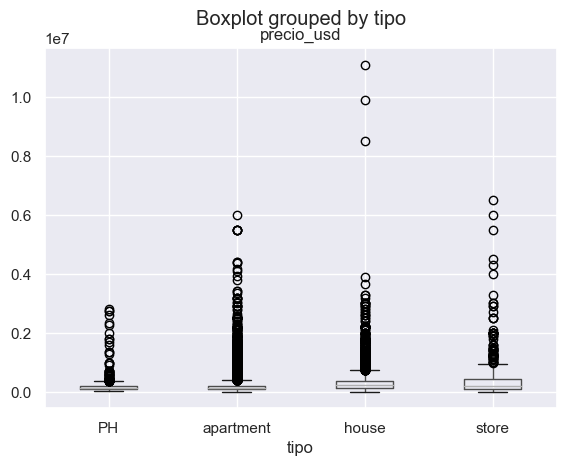

In [34]:
data.boxplot(column= "precio_usd", by="tipo") 
plt.show()

In [35]:
#masc_barrio = data[data["municipio"]=="Tigre"]
#sns.scatterplot(data=masc_barrio, x='sup_m2_total', y='precio_usd', palette="deep")
#plt.grid()
#plt.show()


Con base a los graficos anteriormente mostrados se decidió elegir al barrio de Almagro para realizar los modelos tomando en cuenta:
- Presenta una distribucion de precios "uniforme" Es un barrio que no está ""graficar la distribucion de precios de almagro" 
- tiene más de 500 registros
- Es un barrio conocido

In [36]:
#data_Caballito = data[data['municipio'] == 'Caballito']
#data_Caballito.to_csv('./data_limpio_gdf_caballito.csv', index=False)

In [37]:
df = pd.read_csv('./data_limpio_gdf_caballito.csv')

In [38]:
df.head(4)

,municipio,provincia,lat,lon,sup_m2_total,precio_usd,tipo,ambientes_cat,precio_usd_por_m2,tipo_cat_code,municipio_cat_code,provincia_cat_code,ambientes_cat_code,geometry,precio_usd_por_m2_cat
0,Caballito,Capital Federal,-34.622211,-58.439128,50.0,110000.0,apartment,3,2200.000000,1,34,5,3,POINT (-58.43912829999999 -34.6222111),5
1,Caballito,Capital Federal,-34.623894,-58.446861,46.0,170500.0,apartment,2,3706.521739,1,34,5,2,POINT (-58.4468606529 -34.6238943143),8
2,Caballito,Capital Federal,-34.620928,-58.445874,75.0,220410.0,apartment,3,2938.800000,1,34,5,3,POINT (-58.445873600000006 -34.6209278),7
3,Caballito,Capital Federal,-34.620928,-58.445874,75.0,222780.0,apartment,3,2970.400000,1,34,5,3,POINT (-58.445873600000006 -34.6209278),7


## Regresión lineal simple

In [39]:
# Asignamos la variable a predecir
y = df['precio_usd']

In [40]:
# Asignamos la variable predictora
X_simple = df[['sup_m2_total']]

In [41]:
# Dividimos el dataset en train y test

X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

In [42]:
# Instanciamos el modelo y lo entrenamos

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [43]:
# Guardamos  las predicciones en un nuevo vector que llamaremos predictions.
predictions = lr.predict(X_simple)

In [44]:
# Imprimimos el intercepto y los coeficientes como atributos del objeto entrenado.
print ('Intercepto=', ' ', lr.intercept_)
print ('sup_m2_total=', ' ', lr.coef_)
# imprimos la metrica que mide la bondad de ajusto del modelo. En este caso el R2.
print ('R2_train=', ' ', lr.score(X_simple, y))

Intercepto=   55234.544816269045
sup_m2_total=   [1875.77315523]
R2_train=   0.40423419604589217


In [45]:
# Generamos una función que resume los coeficientes, el intercepto y el R2
# "model" = objeto con el modelo
# "X" = matrix de variables independientes

def sum_mod(lr, X):
    a = pd.DataFrame(lr.coef_ , X_simple.columns.values)
    a = a.append(pd.DataFrame([lr.intercept_, lr.score(X_simple, y)], index=['Intecept','R2']))
    return(a)

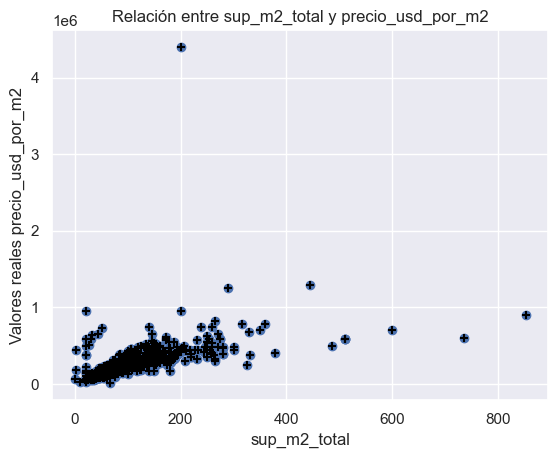

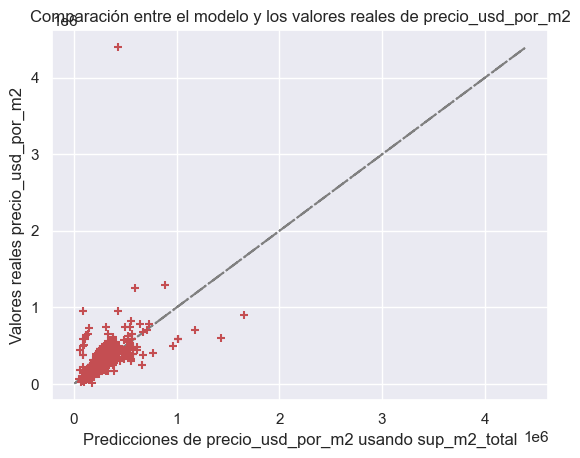

In [46]:
# Graficamos la variable X contra la variable Y
plt.scatter(X_simple, y, s=30, c='black', marker='+', zorder=10)
plt.scatter(X_simple, y)
plt.xlabel("sup_m2_total")
plt.ylabel("Valores reales precio_usd_por_m2")
plt.title('Relación entre sup_m2_total y precio_usd_por_m2')
plt.show()

# Graficamos el modelo
plt.plot(y,y, '-.',c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones de precio_usd_por_m2 usando sup_m2_total")
plt.ylabel("Valores reales precio_usd_por_m2")
plt.title('Comparación entre el modelo y los valores reales de precio_usd_por_m2')
plt.show()

In [47]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [48]:
print ("EMC:", mean_squared_error(y, predictions)) # error medio cuadrático
sum_mod(lr, X_simple)

EMC: 15438266078.254463


C:\Users\DELL\AppData\Local\Temp\ipykernel_14344\3983513970.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a = a.append(pd.DataFrame([lr.intercept_, lr.score(X_simple, y)], index=['Intecept','R2']))


,0
sup_m2_total,1875.773155
Intecept,55234.544816
R2,0.404234


In [49]:
# FILTRAR VALORES MAYORES QUE CERO Y SACAR OUTLIERS

In [50]:
#Solo para departamentos

In [51]:
tipo_dept = ["apartment"]
df_2 = df[df["tipo"].isin(tipo_dept)]

In [52]:
# Asignamos la variable a predecir
y = df_2['precio_usd']

In [53]:
# Asignamos la variable predictora
X = df_2[['sup_m2_total']]

In [54]:
# Dividimos el dataset en train y test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Instanciamos el modelo y lo entrenamos

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [56]:
# Guardamos  las predicciones en un nuevo vector que llamaremos predictions.
predictions = lr.predict(X)

In [57]:
# Imprimimos el intercepto y los coeficientes como atributos del objeto entrenado.
print ('Intercepto=', ' ', lr.intercept_)
print ('sup_m2_total=', ' ', lr.coef_)
# imprimos la metrica que mide la bondad de ajusto del modelo. En este caso el R2.
print ('R2_train=', ' ', lr.score(X, y))

Intercepto=   18397.391173589276
sup_m2_total=   [2453.16272062]
R2_train=   0.4293911377822358


In [58]:
# Generamos una función que resume los coeficientes, el intercepto y el R2
# "model" = objeto con el modelo
# "X" = matrix de variables independientes

def sum_mod(lr, X):
    a = pd.DataFrame(lr.coef_ , X.columns.values)
    a = a.append(pd.DataFrame([lr.intercept_, lr.score(X, y)], index=['Intecept','R2']))
    return(a)

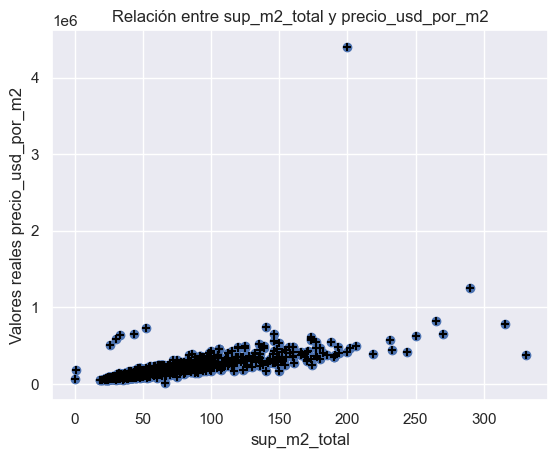

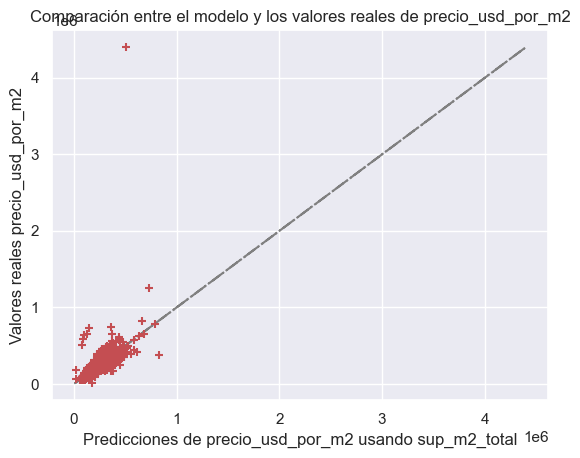

In [59]:
# Graficamos la variable X contra la variable Y
plt.scatter(X, y, s=30, c='black', marker='+', zorder=10)
plt.scatter(X, y)
plt.xlabel("sup_m2_total")
plt.ylabel("Valores reales precio_usd_por_m2")
plt.title('Relación entre sup_m2_total y precio_usd_por_m2')
plt.show()

# Graficamos el modelo
plt.plot(y,y, '-.',c='grey')
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicciones de precio_usd_por_m2 usando sup_m2_total")
plt.ylabel("Valores reales precio_usd_por_m2")
plt.title('Comparación entre el modelo y los valores reales de precio_usd_por_m2')
plt.show()

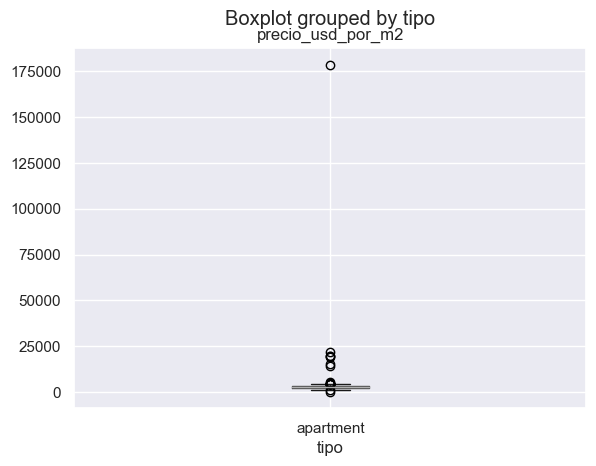

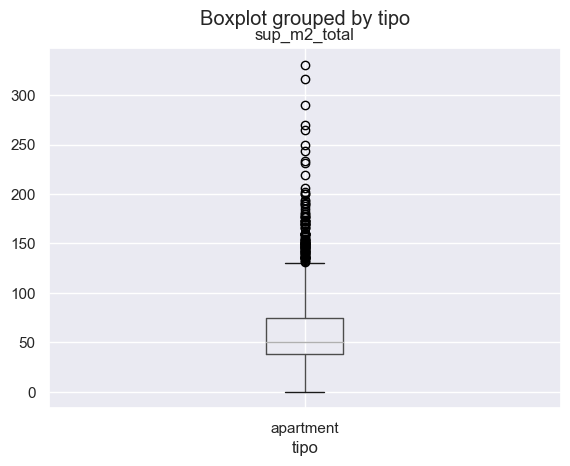

In [60]:
#sacar los outliers

df_2.boxplot(column = "precio_usd_por_m2", by="tipo")
df_2.boxplot(column = "sup_m2_total", by="tipo")
plt.show()

In [61]:
#revisamos la estadisticos de media, desviacion y rangos intercuartilicos
#df_2[["precio_usd_por_m2", "sup_m2_total" ]].describe()

In [62]:
#vamos a verificar cuales son los datos que se encuentran por encima del tercer quartil y buscamos los limites superiores e inferiores
#para determinar que registros pueden considerarse extremos
#q1, q2, q3 = df_2["sup_m2_total"].quantile([0.25, 0.50, 0.75])
#print("Q1:", q1,"\nq2:", q2,"\nq3:", q3 )

In [63]:
#para surface_total_in_m2 hayamos el limite superior: aplicamos la formula de calcular el rango intercuartilico y luego el valor superior
#iqr = q3-q1
#ls = q3 + 1.5*iqr
#print("El limite superior para considerar un outlier en superficie_m2_total es:", ls)

In [64]:
# li = q1 - 1.5*iqr
# print("El limite inferior para considerar un outlier en superficie_m2_total es:", li)

In [65]:
#aplicamos el metodo query para consultar que campos son los que cumplen con tener valores por encima del limite superior 
#datos_outliers_ls = 
#df_2.query("sup_m2_total > @ls").sample(4)
#vemos que estos valores extremos pertenecen a casas en zonas rurales por lo cuall tiene sentido sus superficie


In [66]:
#limite_superior = 120
#masc_sup_m2_limite = df_2["sup_m2_total"] < limite_superior
#df_2.loc[masc_sup_m2_limite].head(4)

In [67]:
#df_3 = df_2.loc[masc_sup_m2_limite]

In [68]:
#df_3[["precio_usd_por_m2", "sup_m2_total" ]].describe()

In [69]:
# Asignamos la variable a predecir
#y = df_3['precio_usd_por_m2']

In [70]:
# Asignamos la variable predictora
#X = df_3[['sup_m2_total']]

In [71]:
# Dividimos el dataset en train y test

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# Instanciamos el modelo y lo entrenamos

#lr = linear_model.LinearRegression()
#lr.fit(X_train, y_train)

In [73]:
# Guardamos  las predicciones en un nuevo vector que llamaremos predictions.
#predictions = lr.predict(X)

In [74]:
# Imprimimos el intercepto y los coeficientes como atributos del objeto entrenado.
#print ('Intercepto=', ' ', lr.intercept_)
#print ('sup_m2_total=', ' ', lr.coef_)
# imprimos la metrica que mide la bondad de ajusto del modelo. En este caso el R2.
#print ('R2_train=', ' ', lr.score(X, y))

## Regresión linear múltiple

In [75]:
# Asignamos las variables predictoras

X = df_2[['lat', 'lon', 'sup_m2_total']]

y = df_2['precio_usd']


In [76]:
# Normalizamos los datos

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


In [77]:
# Dividimos en train y test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Instanciamos el modelo y lo entrenamos

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [79]:
# Vemos los coeficientes

print('Coeficientes: ', lr.coef_)
print('Intercepto: ', lr.intercept_)

Coeficientes:  [-1615.03965164  -577.36401551 91660.68666083]
Intercepto:  173680.90580340437


In [80]:
# Calculamos el R2

print('R2: ', r2_score(y_test, lr.predict(X_test)))


R2:  0.2274999327106061


In [81]:
# Modelamos con statsmodels

X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             precio_usd   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     1074.
Date:                Mon, 28 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:55:27   Log-Likelihood:                -15515.
No. Observations:                1255   AIC:                         3.104e+04
Df Residuals:                    1251   BIC:                         3.106e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.737e+05   1599.489    108.585      0.000    1.71e+05    1.77e+05
x1         -1615.0397   1698.231     -0.951      0.342   -4946.735    1716.656
x2          -577.3640   1759.542     -0.328      0.743   -4029.343    2874.615
x3          9.166e+04   1619.871     56.585      0.000    8.85e+04    9.48e+04
==============================================================================
Omnibus:                     1146.700   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            66511.504
Skew:                           4.018   Prob(JB):                         0.00
Kurtosis:                      37.747   Cond. No.                         1.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
# Probamos con regularización ridge

lm_ridge = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))

model_ridge = lm_ridge.fit(X_train, y_train)

lm_ridge.alpha_

1.0

In [83]:
model_ridge.score(X_test, y_test)

0.2274277633079136

In [84]:
# Probamos con regularización lasso

lm_lasso = linear_model.LassoCV(alphas=np.logspace(-6, 6, 13), cv=5)

model_lasso = lm_lasso.fit(X_train, y_train)

lm_lasso.alpha_

1000.0

In [85]:
model_lasso.score(X_test, y_test)

0.22678208734589933

In [86]:
dummy = pd.get_dummies(df['ambientes_cat'], drop_first=True)
dummy.head()

,1,2,3,4 o mas
0,0,0,1,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [87]:
df_3 = pd.concat([df_2["sup_m2_total"],dummy],axis=1)
df_3.head(4)

,sup_m2_total,1,2,3,4 o mas
0,50.0,0,0,1,0
1,46.0,0,1,0,0
2,75.0,0,0,1,0
3,75.0,0,0,1,0


In [88]:
# Asignamos las variables predictoras

X = df_3

y = df_2['precio_usd']


In [89]:
# Normalizamos los datos

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


In [90]:
# Dividimos en train y test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [1726, 1569]

In [ ]:
# Instanciamos el modelo y lo entrenamos

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)


In [ ]:
# Vemos los coeficientes

print('Coeficientes: ', lr.coef_)
print('Intercepto: ', lr.intercept_)

In [ ]:
# Calculamos el R2

print('R2: ', r2_score(y_test, lr.predict(X_test)))


In [ ]:
# Modelamos con statsmodels

X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()

model.summary()

In [ ]:
# Probamos con regularización ridge

lm_ridge = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))

model_ridge = lm_ridge.fit(X_train, y_train)

lm_ridge.alpha_

In [ ]:
model_ridge.score(X_test, y_test)

In [ ]:
# Probamos con regularización lasso

lm_lasso = linear_model.LassoCV(alphas=np.logspace(-6, 6, 13), cv=5)

model_lasso = lm_lasso.fit(X_train, y_train)

lm_lasso.alpha_

In [ ]:
model_lasso.score(X_test, y_test)